# Дзгоев ДЗ 25.11.2020

In [105]:
# Не забудь удалить лишнее
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model as lm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import os

In [106]:
# Собираем датафрейм
data = pd.read_csv('X.txt', sep = '\t')
data['new_cases'] = pd.read_csv('X2.txt', sep = '\t')['new_cases']
data['PTC'] = pd.read_csv('PTC.txt', sep = '\t',decimal=',')['CLOSE']
data.head()

,date,total_cases,new_cases,PTC
0,2020-03-12,25,15,966
1,2020-03-13,30,5,991
2,2020-03-14,45,15,#Н/Д
3,2020-03-15,59,14,#Н/Д
4,2020-03-16,63,4,966


In [107]:
# Предобработка данных
data.replace('#Н/Д',0,inplace=True)# тут шаманим с РТС, потому что там были пропуски
data.PTC = data.PTC.astype('int32')

array = []
for i in data.PTC:
    if i != 0:
        array.append(i)
        
data.replace(0,np.mean(array),inplace=True)

data.date = range(data.shape[0])# меняем дату

## Total cases от date

In [108]:
# Делим данные
x_train, x_test, y_train, y_test = train_test_split(data.date, data.total_cases, test_size = 0.3, random_state = 1)

In [109]:
reg = lm.LinearRegression() 

x_train = x_train.values.reshape(-1,1)
x_test = x_test.values.reshape(-1,1)

In [110]:
reg.fit(x_train, y_train)
predicted = reg.predict(x_train)
reg.score(x_test,y_test)

0.9813624267299619

In [111]:
# Неплохо, но..
reg.score(x_test,y_test)

0.9813624267299619

In [112]:
# Посмотрим на полиномиальнуую регрессию
degree=5
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(x_train,y_train)

# Считаю результат великолепным
polyreg.score(x_test,y_test)

0.9996419740372113

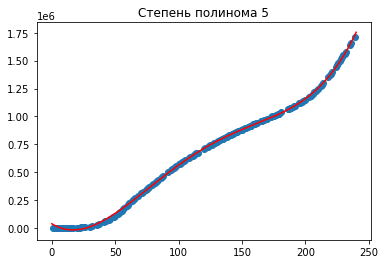

In [113]:
X_seq = np.linspace(x_test.min(),x_test.max(),300).reshape(-1,1)
plt.figure()
plt.scatter(x_train,y_train)
plt.plot(X_seq,polyreg.predict(X_seq),color="r")
plt.title("Степень полинома "+str(degree))
plt.show()

**Вывод**

Полиномиальная регрессия показывает лучшую точность, в сравнении с линейной. 

Руками перебрал все степени и 5ая лучше всего описывает наши данные. 

Точность крайне близка 1, модель считаю точной.

In [114]:
# Сохраним прогноз на зиму
winter_days = np.asarray(range(243,342))
winter_days = winter_days.reshape(-1,1)
winter_total_cases = polyreg.predict(winter_days)

## New cases от date

In [115]:
# Делим данные
x_train, x_test, y_train, y_test = train_test_split(data.date, data.new_cases, test_size = 0.3, random_state = 1)

In [116]:
reg = lm.LinearRegression() 

x_train = x_train.values.reshape(-1,1)
x_test = x_test.values.reshape(-1,1)

In [117]:
reg.fit(x_train, y_train)
predicted = reg.predict(x_train)

In [118]:
# Чуть лучше, чем пальцем в небо
reg.score(x_test,y_test)

0.44974240071196503

In [119]:
# Посмотрим на полиномиальнуую регрессию
degree=8
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(x_train,y_train)

# Считаю результат великолепным х2
polyreg.score(x_test,y_test)

0.9716881059853473

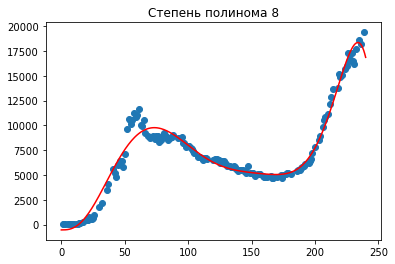

In [120]:
X_seq = np.linspace(x_test.min(),x_test.max(),300).reshape(-1,1)
plt.figure()
plt.scatter(x_train,y_train)
plt.plot(X_seq,polyreg.predict(X_seq),color="r")
plt.title("Степень полинома "+str(degree))
plt.show()

**Вывод**

Полиномиальная регрессия также показывает лучшую точность, в сравнении с линейной. 

Руками перебрал все степени и 8ая лучше всего описывает наши данные. К сожалению не удается отловить пик измерений (в районе 60 дня), поэтому точность чуть хуже.

Тем не менее, точность крайне близка 1, модель считаю точной.

In [121]:
# Сохраним прогноз на зиму
winter_days = np.asarray(range(243,342))
winter_days = winter_days.reshape(-1,1)
winter_new_cases = polyreg.predict(winter_days)

## Тестовый прогноз

In [122]:
# Довольно большая дельта, потому что реально точные прогнозы модель дает после пика в марте
test_day = np.asarray([24])
test_day = test_day.reshape(-1,1)
test_case = polyreg.predict(test_day)
test_case

i = np.where(x_train==24)[0][0]
print(f'День - {x_train[i][0]}, реальные данные - {y_train.values[i]}, прогноз модели - {test_case[0]}')
print(f'Дельта - {(test_case - y_train.values[i])[0]}')

День - 24, реальные данные - 582, прогноз модели - 1625.7151672081682
Дельта - 1043.7151672081682


In [123]:
# Пример для дня из конца весны-начала лета
test_day = np.asarray([100])
test_day = test_day.reshape(-1,1)
test_case = polyreg.predict(test_day)
test_case

i = np.where(x_train==100)[0][0]
print(f'День - {x_train[i][0]}, реальные данные - {y_train.values[i]}, прогноз модели - {test_case[0]}')
print(f'Дельта - {(test_case - y_train.values[i])[0]}')

День - 100, реальные данные - 7972, прогноз модели - 8000.142066724393
Дельта - 28.142066724392862


In [124]:
# Пример для дня из конца лета-начала осени
test_day = np.asarray([175])
test_day = test_day.reshape(-1,1)
test_case = polyreg.predict(test_day)
test_case

i = np.where(x_train==175)[0][0]
print(f'День - {x_train[i][0]}, реальные данные - {y_train.values[i]}, прогноз модели - {test_case[0]}')
print(f'Дельта - {(test_case - y_train.values[i])[0]}')

День - 175, реальные данные - 4952, прогноз модели - 5089.306533001274
Дельта - 137.30653300127415


**Вывод**

Прогноз на весну имеет большую дельту, потому что точность модель набирает с увеличением дней, поэтому уже ближе к лету или осени дельта падает.

## PTC от new cases + date

In [125]:
X = data.drop(['PTC','total_cases'],axis=1)
y = data.PTC

In [126]:
# Делим данные
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [127]:
reg = lm.LinearRegression() 
reg.fit(x_train, y_train)
predicted = reg.predict(x_train)

reg.score(x_test,y_test)

0.1575844190441945

In [174]:
# Посмотрим на полиномиальнуую регрессию
degree=2
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(x_train,y_train)

# Ни о чем
polyreg.score(x_test,y_test)

0.6503506317619165

In [175]:
# Среднее РТС = 1174.5180722891566
# Так как я заполнял данные средним, их теперь надо вытащить
y_for_plt = []
x_for_plt = []

for i,j in enumerate(y_train):
    if j!= 1174.5180722891566:
        y_for_plt.append(j)
        x_for_plt.append(x_train.date.values[i])
        

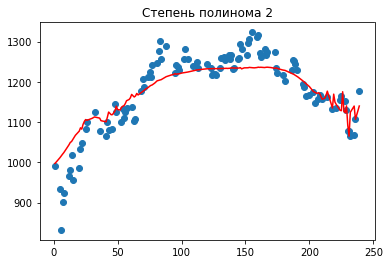

In [176]:
X_seq = np.linspace(0,250,250).reshape(-1,1)

plt.figure()
plt.scatter(x_for_plt,y_for_plt)
plt.plot(x_train.sort_values(by=['date']).date.values,
         polyreg.predict(x_train.sort_values(by=['date'])),color="r")
plt.title("Степень полинома "+str(degree))
plt.show()

**Вывод**

Полиномиальная регрессия показывает лучшую точность, в сравнении с линейной. 

Руками перебрал все степени и 2ая лучше всего описывает наши данные. 

Точность низкая, лучше чем ничего, но моделью пользоваться я бы не стал.

## PTC от total cases + date

In [179]:
X = data.drop(['PTC','new_cases'],axis=1)
y = data.PTC

In [180]:
# Делим данные
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [181]:
reg = lm.LinearRegression() 
reg.fit(x_train, y_train)
predicted = reg.predict(x_train)

reg.score(x_test,y_test)

0.17173590571079245

In [187]:
# Посмотрим на полиномиальнуую регрессию
degree=2
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(x_train,y_train)

# Ни о чем
polyreg.score(x_test,y_test)

0.6166668762071204

In [188]:
# Среднее РТС = 1174.5180722891566
# Так как я заполнял данные средним, их теперь надо вытащить
y_for_plt = []
x_for_plt = []

for i,j in enumerate(y_train):
    if j!= 1174.5180722891566:
        y_for_plt.append(j)
        x_for_plt.append(x_train.date.values[i])

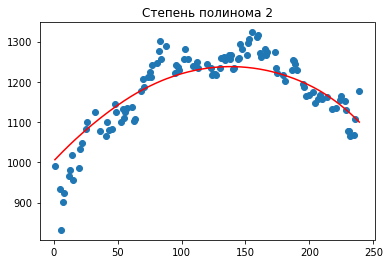

In [189]:
X_seq = np.linspace(0,250,250).reshape(-1,1)

plt.figure()
plt.scatter(x_for_plt,y_for_plt)
plt.plot(x_train.sort_values(by=['date']).date.values,
         polyreg.predict(x_train.sort_values(by=['date'])),color="r")
plt.title("Степень полинома "+str(degree))
plt.show()

**Вывод**

Полиномиальная регрессия показывает лучшую точность, в сравнении с линейной. 

Руками перебрал все степени и 2ая лучше всего описывает наши данные. 

Точность низкая, лучше чем ничего, но моделью пользоваться я бы не стал.

## PTC от total cases + new cases + date

In [191]:
X = data.drop(['PTC'],axis=1)
y = data.PTC

In [192]:
# Делим данные
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [193]:
reg = lm.LinearRegression() 
reg.fit(x_train, y_train)
predicted = reg.predict(x_train)

reg.score(x_test,y_test)

0.1498509244232743

In [194]:
# Посмотрим на полиномиальнуую регрессию
degree=2
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(x_train,y_train)

# Ни о чем
polyreg.score(x_test,y_test)

0.6503506317619165

In [195]:
# Среднее РТС = 1174.5180722891566
# Так как я заполнял данные средним, их теперь надо вытащить
y_for_plt = []
x_for_plt = []

for i,j in enumerate(y_train):
    if j!= 1174.5180722891566:
        y_for_plt.append(j)
        x_for_plt.append(x_train.date.values[i])

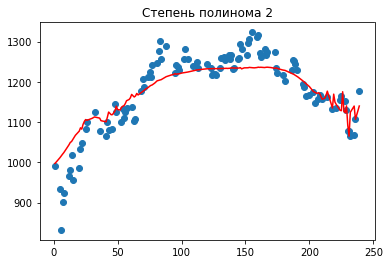

In [196]:
X_seq = np.linspace(0,250,250).reshape(-1,1)

plt.figure()
plt.scatter(x_for_plt,y_for_plt)
plt.plot(x_train.sort_values(by=['date']).date.values,
         polyreg.predict(x_train.sort_values(by=['date'])),color="r")
plt.title("Степень полинома "+str(degree))
plt.show()

**Вывод**

Полиномиальная регрессия показывает лучшую точность, в сравнении с линейной. 

Руками перебрал все степени и 2ая лучше всего описывает наши данные. 

Точность низкая, лучше чем ничего, но моделью пользоваться я бы не стал.

0.6569740361806607


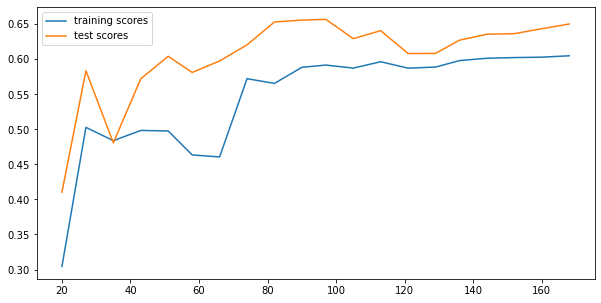

In [143]:
# Проверим на переобучение
training_scores = []
test_scores = []
numbers = []

for i in np.linspace(20, len(x_train), 20):
    polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
    X = x_train[:int(i)]
    y = y_train[:int(i)]
    polyreg.fit(X, y)
    numbers.append(int(i))
    training_scores.append(polyreg.score(x_train, y_train))
    test_scores.append(polyreg.score(x_test, y_test))

plt.figure(figsize=(10, 5))
plt.plot(numbers, training_scores, label="training scores")
plt.plot(numbers, test_scores, label="test scores")
plt.legend(loc="best")
print(max(test_scores))

**Вывод**

На кривой явно видно недообучение

## И наконец финал

In [144]:
# Так как лучший результат был третьей модели с ней и спрогнозируем РТС на зиму
winter_days = np.asarray(range(243,342))
final_df = pd.DataFrame(data=zip(winter_days, winter_total_cases, winter_new_cases), 
                        columns=['date','total_cases','new_cases'])

winter_result = polyreg.predict(final_df)
for i,j in enumerate(winter_result):
    print(f'День зимы #{i}, РТС - {j}')

День зимы #0, РТС - 845.5252536616551
День зимы #1, РТС - 790.3085210219695
День зимы #2, РТС - 731.7013479563664
День зимы #3, РТС - 670.8742334806063
День зимы #4, РТС - 609.443965745352
День зимы #5, РТС - 549.563490834398
День зимы #6, РТС - 494.02497582791943
День зимы #7, РТС - 446.3776007860422
День зимы #8, РТС - 411.0617601031979
День зимы #9, РТС - 393.56151089015543
День зимы #10, РТС - 400.57727542656517
День зимы #11, РТС - 440.2209870152344
День зимы #12, РТС - 522.2360646241357
День зимы #13, РТС - 658.244812348368
День зимы #14, РТС - 862.0260658663208
День зимы #15, РТС - 1149.826150688037
День зимы #16, РТС - 1540.7064769636888
День зимы #17, РТС - 2056.931374236525
День зимы #18, РТС - 2724.4000674541494
День зимы #19, РТС - 3573.1270145521976
День зимы #20, РТС - 4637.775166397672
День зимы #21, РТС - 5958.247074000441
День зимы #22, РТС - 7580.339156062555
День зимы #23, РТС - 9556.464854358353
День зимы #24, РТС - 11946.452845740021
День зимы #25, РТС - 14818.4269

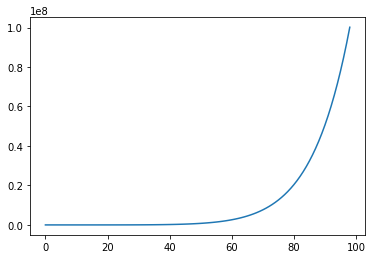

In [145]:
# К весне заживем
plt.figure()
plt.plot(range(0,99), winter_result)

# Выводы

1. Полиномиальные модели показали себя польностью лучше, линейных

2. Прогноз заболевших от дней строится предельно точно, но точен для прогнозирования на ближайшие дни, чем более дальний день прогнозируем, чем ниже качество отчета, тем не менее моделями можно пользоваться

3. РТС точнее всего прогнозируется от даты и новых кейсов и суммартных кейсов (то есть от всего), но разница в точности мала.

4. Все модели по РТС имеют низкую точность

5. В прогнозировании РТС недостаточно данных, это заметно на кривой обучения - явно видно недообучение